# CLASSIFICAÇÃO

## DEVEMOS CONSTRUIR A NOSSA BASE

## 1 - MÉTRICAS

In [28]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def acuracia(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy:.8f}")
    
def erro(y_test, y_pred):
    error = 1 - accuracy_score(y_test, y_pred)
    print(f"Erro: {error:.8f}")
    
def recall(y_test, y_pred):
    sensibilidade = recall_score(y_test, y_pred)
    print(f"Recall: {sensibilidade:.8f}")
    return sensibilidade
    
def especificidade(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f"Especificidade: {specificity:.8f}")
    
def precisao(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    print(f"Precisão: {precision:.8f}")
    return precision
    
def f1_score(y_test, y_pred):
    numerador = 2 * precisao(y_test, y_pred) * recall(y_test, y_pred)
    denominador = precisao(y_test, y_pred) + recall(y_test, y_pred)
    f1 = numerador / denominador
    print(f"F1-Score: {f1:.8f}")
    
def auc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    print(f"Área AUC: {area:.8f}")
    
def auc_roc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"Curva ROC (Área = {area:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva Característica de Operação do Receptor')
    plt.legend(loc="lower right")
    plt.show()
    
def matriz(y, y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz da Confusão')
    plt.show()

def mar(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    miss_alarm_rate = fn / (fn + tp)
    print(f"Miss Alarm Rate: {miss_alarm_rate:.8f}")

def far(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    false_alarm_rate = fp / (fp + tn)
    print(f"False Alarm Rate: {false_alarm_rate:.8f}")
    
def ks(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    ks_statics = max(tpr - fpr)
    print(f"KS: {ks_statics:.8f}")
    
def metricas(classes, y_test, y_pred, prob):
    acuracia(y_test, y_pred)
    erro(y_test, y_pred)
    recall(y_test, y_pred)
    especificidade(y_test, y_pred)
    precisao(y_test, y_pred)
    f1_score(y_test, y_pred)
    auc(y_test, prob)
    auc_roc(y_test, prob)
    matriz(classes, y_test, y_pred)
    mar(y_test, y_pred)
    far(y_test, y_pred)
    ks(y_test, prob)

## 2 - TRATAR OS DADOS

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("cs-training.csv", index_col=False)

df.fillna(0, inplace=True)

colunas = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

x = df[colunas].values
y = df["SeriousDlqin2yrs"].values

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [30]:
print(x)
print(y)

[[ 0.76612661 45.          2.         ...  6.          0.
   2.        ]
 [ 0.95715102 40.          0.         ...  0.          0.
   1.        ]
 [ 0.65818014 38.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.24604392 58.          0.         ...  1.          0.
   0.        ]
 [ 0.         30.          0.         ...  0.          0.
   0.        ]
 [ 0.85028295 64.          0.         ...  2.          0.
   0.        ]]
[1 0 0 ... 0 0 0]


## 3 - KNN

Acurácia: 0.93311111
Erro: 0.06688889
Recall: 0.02131258
Especificidade: 0.99721720
Precisão: 0.35000000
Precisão: 0.35000000
Recall: 0.02131258
Precisão: 0.35000000
Recall: 0.02131258
F1-Score: 0.04017857
Área AUC: 0.56719579


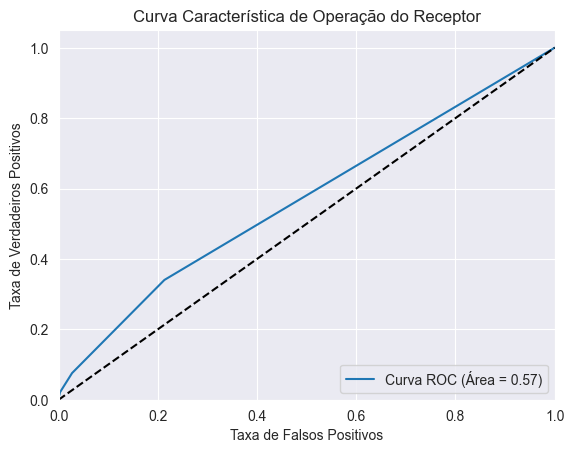

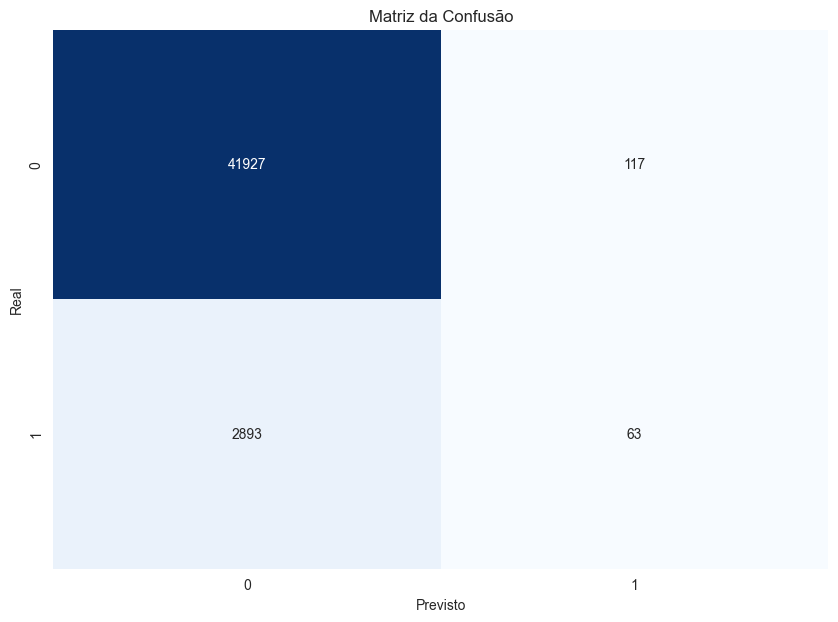

Miss Alarm Rate: 0.97868742
False Alarm Rate: 0.00278280
KS: 0.12707198


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_treino, y_treino)

previsto = knn.predict(x_teste)
previsto_prob = knn.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 4 - REDES NEURAIS

Iteration 1, loss = 0.26294028
Iteration 2, loss = 0.24669948
Iteration 3, loss = 0.24662600
Iteration 4, loss = 0.24650879
Iteration 5, loss = 0.24659492
Iteration 6, loss = 0.24674999
Iteration 7, loss = 0.24675035
Iteration 8, loss = 0.24682156
Iteration 9, loss = 0.24680662
Iteration 10, loss = 0.24679162
Iteration 11, loss = 0.24671464
Iteration 12, loss = 0.24662806
Iteration 13, loss = 0.24646358
Iteration 14, loss = 0.24617277
Iteration 15, loss = 0.24579535
Iteration 16, loss = 0.24635083
Iteration 17, loss = 0.24636950
Iteration 18, loss = 0.24576001
Iteration 19, loss = 0.24575342
Iteration 20, loss = 0.24560349
Iteration 21, loss = 0.24495732
Iteration 22, loss = 0.24505331
Iteration 23, loss = 0.24463996
Iteration 24, loss = 0.24440049
Iteration 25, loss = 0.24457272
Iteration 26, loss = 0.24428314
Iteration 27, loss = 0.24372883
Iteration 28, loss = 0.24344778
Iteration 29, loss = 0.24320758
Iteration 30, loss = 0.24562449
Iteration 31, loss = 0.24408311
Iteration 32, los

C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\AppD

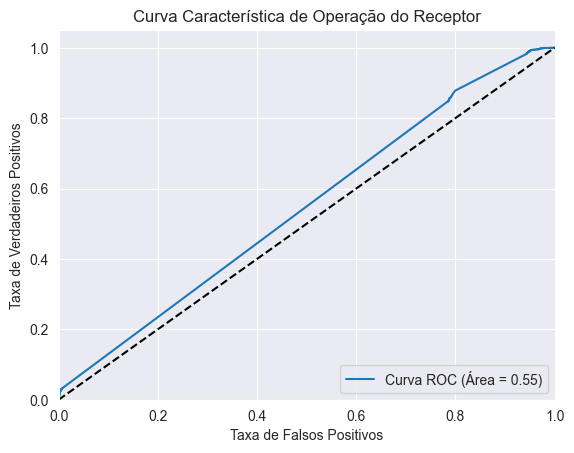

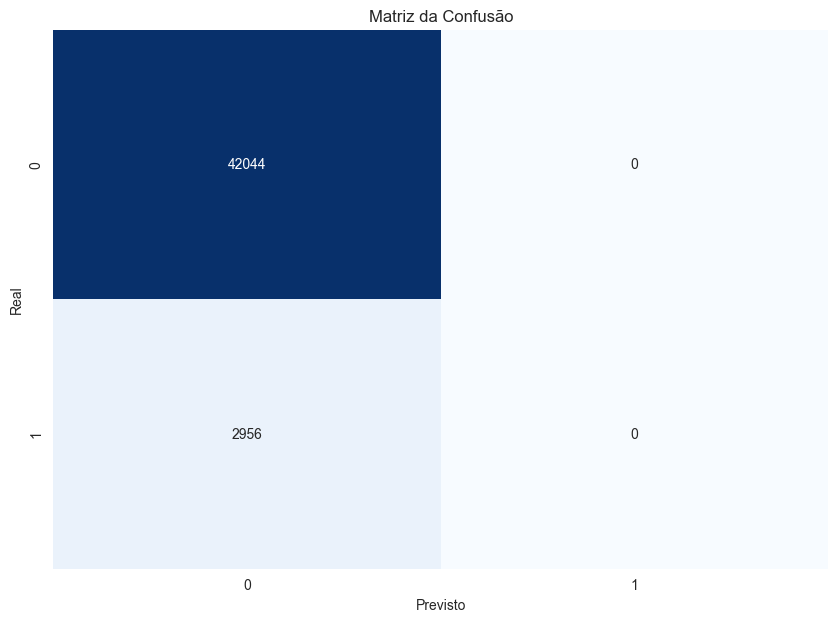

Miss Alarm Rate: 1.00000000
False Alarm Rate: 0.00000000
KS: 0.07871273
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     42044
           1       0.00      0.00      0.00      2956

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.87      0.93      0.90     45000



C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver="adam", alpha=0.0001, hidden_layer_sizes=(5, 5, 5), random_state=1, learning_rate='constant', learning_rate_init=0.01, max_iter=100, activation="logistic", tol=0.0001, verbose=True)

mlp.fit(x_treino, y_treino)
previsto = mlp.predict(x_teste)
previsto_prob = mlp.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)
print(classification_report(y_teste, previsto))

# 5 - SVM

Acurácia: 0.93431111
Erro: 0.06568889
Recall: 0.00000000
Especificidade: 1.00000000
Precisão: 0.00000000
Precisão: 0.00000000
Recall: 0.00000000
Precisão: 0.00000000
Recall: 0.00000000
F1-Score: nan
Área AUC: 0.59712878


C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\AppD

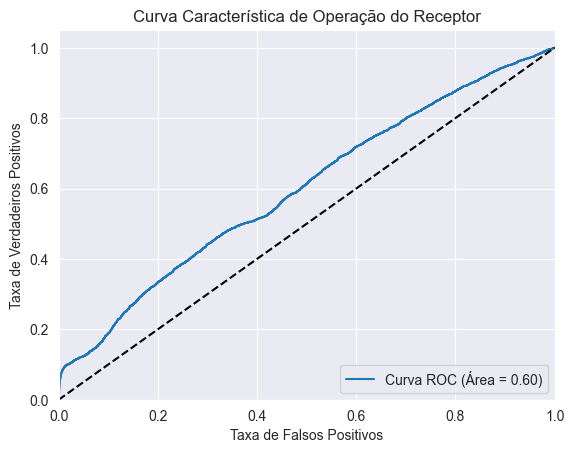

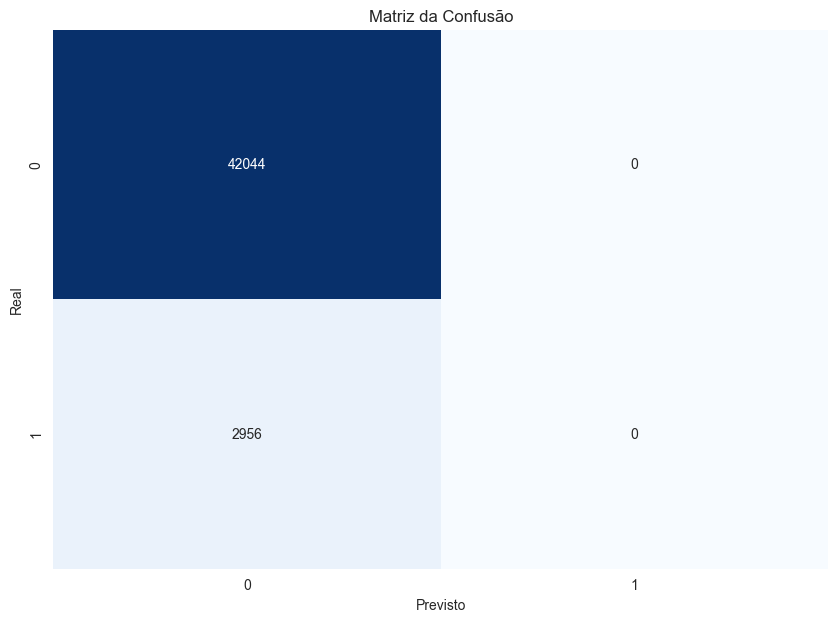

Miss Alarm Rate: 1.00000000
False Alarm Rate: 0.00000000
KS: 0.14197666


In [39]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(x_treino, y_treino)
previsto = svm.predict(x_teste)
previsto_prob = svm.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

# 6 - DECISION TREE

Acurácia: 0.89782222
Erro: 0.10217778
Recall: 0.29296346
Especificidade: 0.94034821
Precisão: 0.25666864
Precisão: 0.25666864
Recall: 0.29296346
Precisão: 0.25666864
Recall: 0.29296346
F1-Score: 0.27361769
Área AUC: 0.61737016


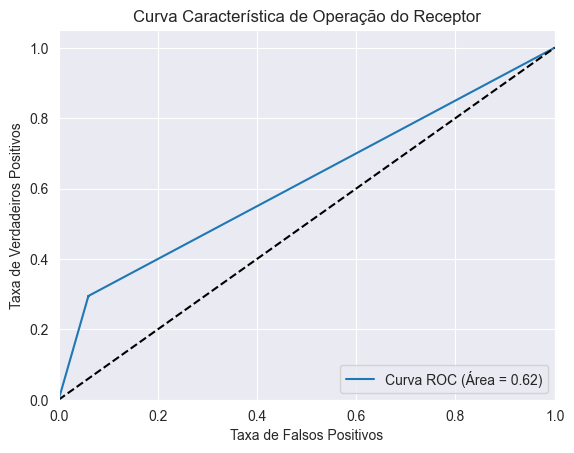

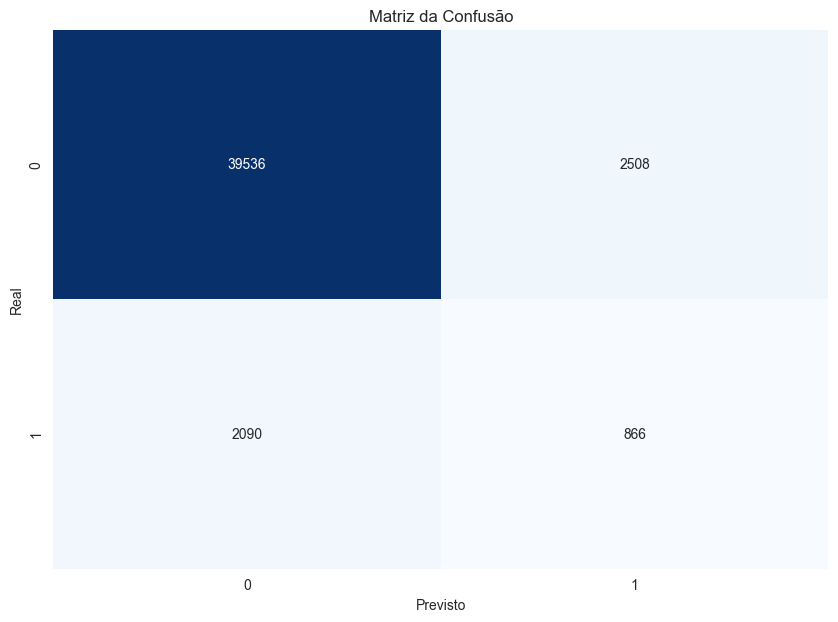

Miss Alarm Rate: 0.70703654
False Alarm Rate: 0.05965179
KS: 0.23479439


In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(x_treino, y_treino)
previsto = tree.predict(x_teste)
previsto_prob = tree.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 7 - RANDOM FLOREST

Acurácia: 0.93726667
Erro: 0.06273333
Recall: 0.08254398
Especificidade: 0.99735991
Precisão: 0.68732394
Precisão: 0.68732394
Recall: 0.08254398
Precisão: 0.68732394
Recall: 0.08254398
F1-Score: 0.14738750
Área AUC: 0.85677074


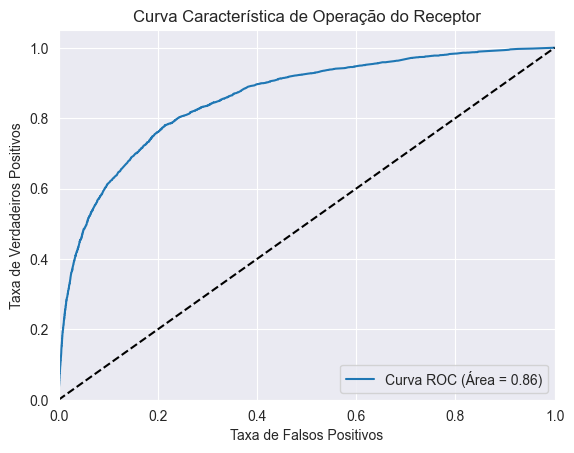

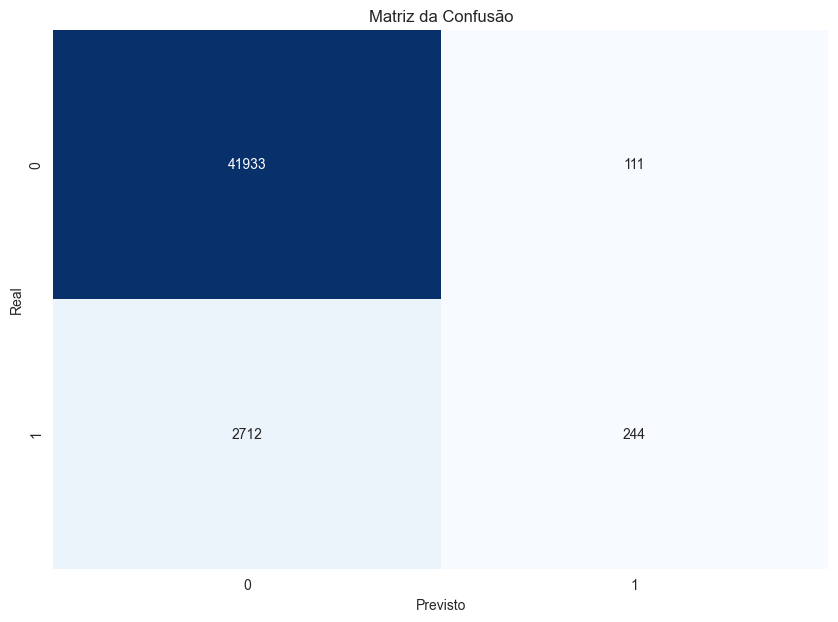

Miss Alarm Rate: 0.91745602
False Alarm Rate: 0.00264009
KS: 0.56540715


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=1)

rf.fit(x_treino, y_treino)
previsto = rf.predict(x_teste)
previsto_prob = rf.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 8 - GRADIENT BOOSTING

Acurácia: 0.92737778
Erro: 0.07262222
Recall: 0.36062246
Especificidade: 0.96722481
Precisão: 0.43617021
Precisão: 0.43617021
Recall: 0.36062246
Precisão: 0.43617021
Recall: 0.36062246
F1-Score: 0.39481481
Área AUC: 0.66392364


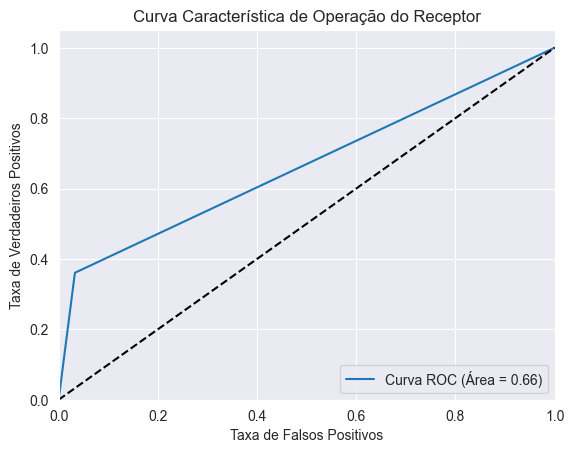

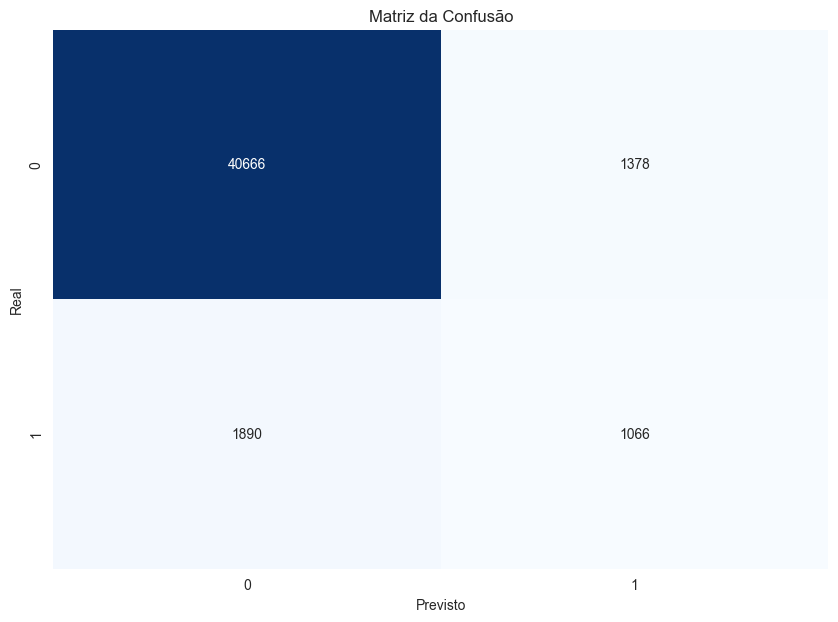

Miss Alarm Rate: 0.63937754
False Alarm Rate: 0.03277519
KS: 0.32784727


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(x_treino, y_treino)
previsto = gb.predict(x_teste)
previsto_prob = gb.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 9 - NAIVE BAYES

Acurácia: 0.93357778
Erro: 0.06642222
Recall: 0.02368065
Especificidade: 0.99755019
Precisão: 0.40462428
Precisão: 0.40462428
Recall: 0.02368065
Precisão: 0.40462428
Recall: 0.02368065
F1-Score: 0.04474273
Área AUC: 0.70397355


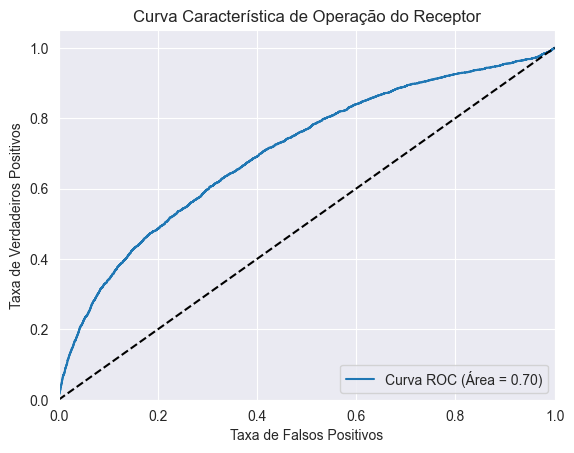

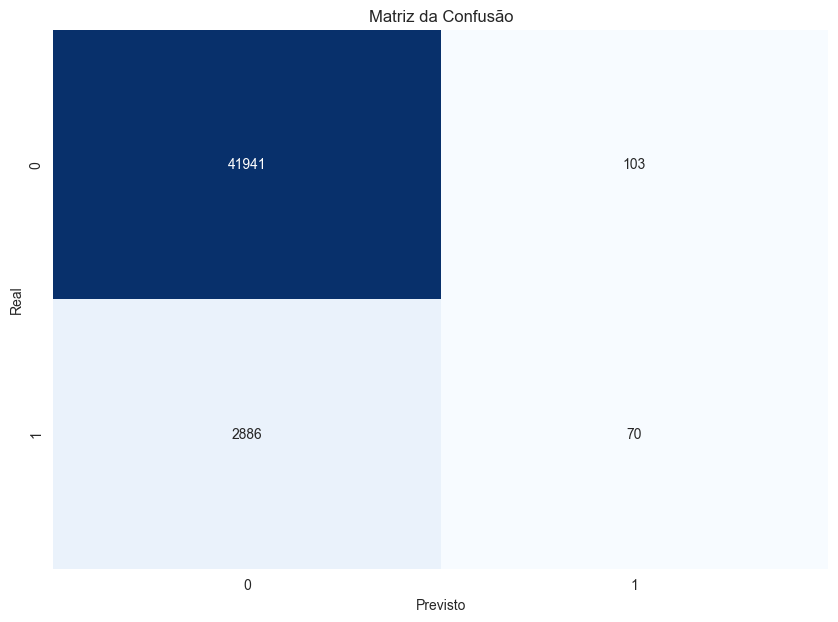

Miss Alarm Rate: 0.97631935
False Alarm Rate: 0.00244981
KS: 0.30002415


In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_treino, y_treino)
previsto = nb.predict(x_teste)
previsto_prob = nb.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 10 - PROCESSO GAUSSIANO

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gp = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
gp.fit(x_treino, y_treino)
previsto = gp.predict(x_teste)
previsto_prob = gp.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

MemoryError: Unable to allocate 82.1 GiB for an array with shape (105000, 105000) and data type float64

## 11 - ADABOOST

C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acurácia: 0.93826667
Erro: 0.06173333
Recall: 0.20940460
Especificidade: 0.98951099
Precisão: 0.58396226
Precisão: 0.58396226
Recall: 0.20940460
Precisão: 0.58396226
Recall: 0.20940460
F1-Score: 0.30826693
Área AUC: 0.85817584


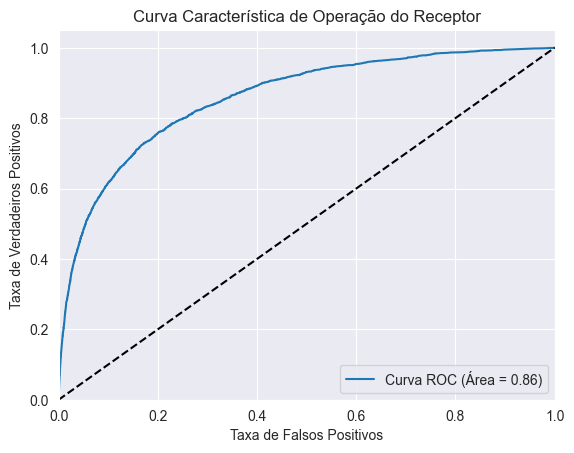

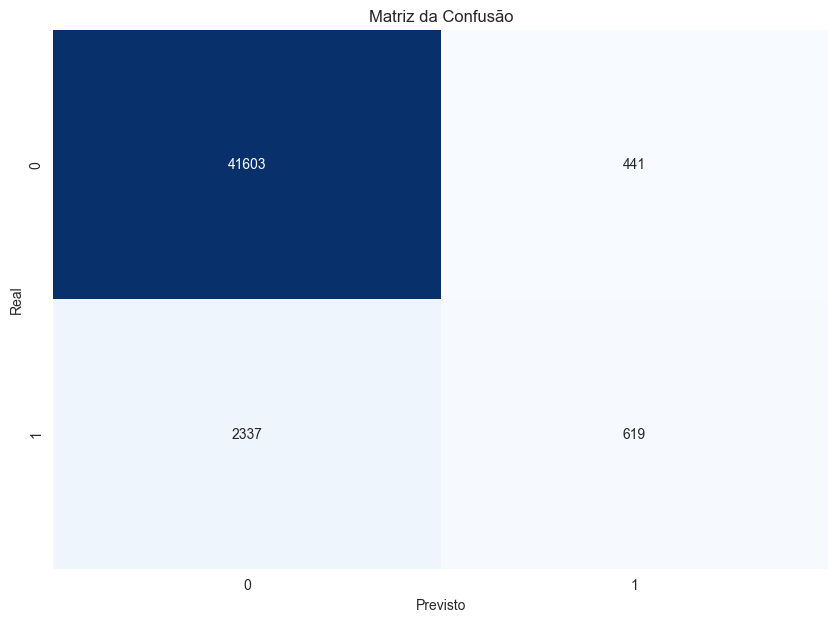

Miss Alarm Rate: 0.79059540
False Alarm Rate: 0.01048901
KS: 0.55850296


In [41]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(x_treino, y_treino)
previsto = ab.predict(x_teste)
previsto_prob = ab.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 12 - QUADRATIC DISCRIMINANT ANALYSIS

Acurácia: 0.90846667
Erro: 0.09153333
Recall: 0.43267930
Especificidade: 0.94191799
Precisão: 0.34372481
Precisão: 0.34372481
Recall: 0.43267930
Precisão: 0.34372481
Recall: 0.43267930
F1-Score: 0.38310619
Área AUC: 0.80160801


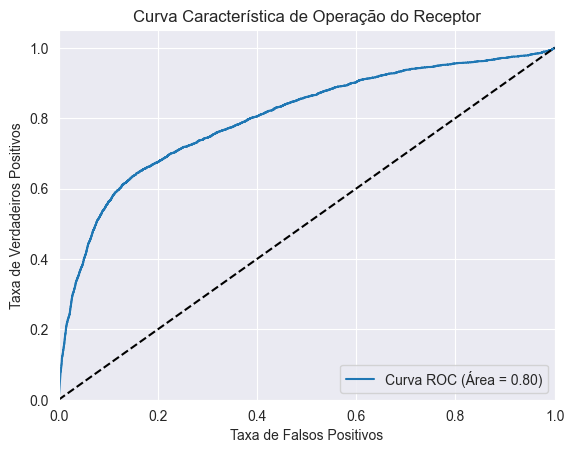

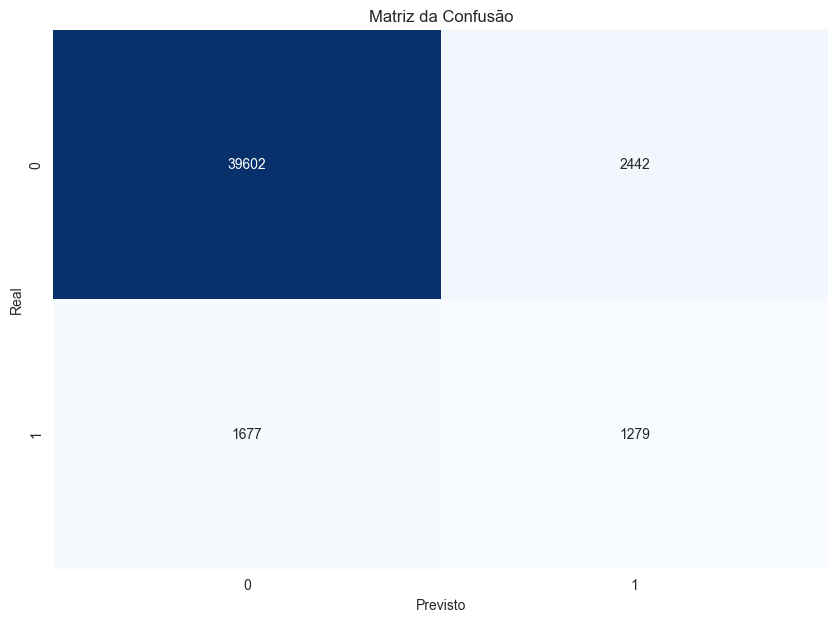

Miss Alarm Rate: 0.56732070
False Alarm Rate: 0.05808201
KS: 0.48638201
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42044
           1       0.34      0.43      0.38      2956

    accuracy                           0.91     45000
   macro avg       0.65      0.69      0.67     45000
weighted avg       0.92      0.91      0.91     45000



In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_treino, y_treino)
previsto = qda.predict(x_teste)
previsto_prob = qda.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

print(classification_report(y_teste, previsto))

In [3]:
a = 12
b = 145

(print
 (f"""
a: {a}
b: {b}
"""))


a: 12
b: 145

